In [87]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from shutil import rmtree
from os.path import isdir
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split

In [88]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [89]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.mnist.load_data()

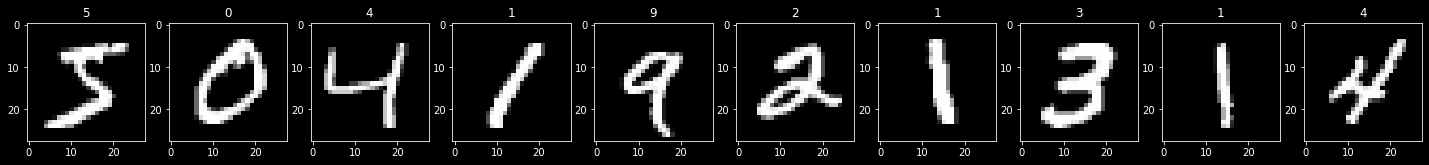

In [90]:
# plt.figure(figsize=[10,2])
f, ax = plt.subplots(1, 10, figsize=[25,5])
# plt.imshow()
for i in range(0, 10):
	image = np.reshape(x_train_raw[i], (28,28))
	label = y_train_raw[i]
	ax[i].imshow(image, cmap='Greys_r')
	ax[i].set_title(label)
	# plt.figimage(image)
# plt.show()


In [91]:
pd.DataFrame(y_train_raw).describe()

,0
count,60000.000000
mean,4.453933
std,2.889270
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


In [92]:
x_train = np.reshape(x_train_raw, (-1, 28, 28, 1))
y_train = tf.one_hot(y_train_raw, 10).numpy()
x_test = np.reshape(x_test_raw, (-1, 28, 28, 1))
y_test = tf.one_hot(y_test_raw, 10).numpy()

In [93]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [94]:
epochs = 20
learning_rate = 0.001
batch_size = 512
n_input = 28
n_classes = 10

In [95]:
model = None
model = Sequential()

model.add(preprocessing.Resizing(28, 28))
model.add(preprocessing.Rescaling(1./255))

# model.add(preprocessing.RandomFlip())
model.add(preprocessing.RandomRotation(0.10))
model.add(preprocessing.RandomContrast(0.05))
model.add(preprocessing.RandomZoom(0.05, 0.05))

model.add(Conv2D(64, 7, activation=LeakyReLU(), input_shape=(28, 28, 1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Conv2D(64, 5, activation=LeakyReLU(), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), padding='same'))
model.add(Dropout(0.05))

model.add(Conv2D(64, 3, activation=LeakyReLU(), padding='same'))
model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(64, 3, activation=LeakyReLU(), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.05))

model.add(Flatten())
# model.add(Dense(256, LeakyReLU()))
# model.add(BatchNormalization())
model.add(Dense(128, LeakyReLU()))
model.add(BatchNormalization())
model.add(Dense(84, LeakyReLU()))
model.add(BatchNormalization())
model.add(Dropout(0.20))

model.add(Dense(n_classes, 'softmax'))

model.compile(tf.keras.optimizers.Adam(), tf.keras.losses.CategoricalCrossentropy(), 'accuracy')
model.build(input_shape=(1, 28, 28, 1))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resizing_7 (Resizing)        (1, 28, 28, 1)            0         
_________________________________________________________________
rescaling_7 (Rescaling)      (1, 28, 28, 1)            0         
_________________________________________________________________
random_rotation_7 (RandomRot (1, 28, 28, 1)            0         
_________________________________________________________________
random_contrast_7 (RandomCon (1, 28, 28, 1)            0         
_________________________________________________________________
random_zoom_7 (RandomZoom)   (1, 28, 28, 1)            0         
_________________________________________________________________
conv2d_28 (Conv2D)           (1, 28, 28, 64)           3200      
_________________________________________________________________
batch_normalization_42 (Batc (1, 28, 28, 64)          

In [96]:
learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', min_delta=0.002, factor=0.01, patience=2) #0.001
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='loss', min_delta=0.002, patience=3, verbose=1,
    mode='auto', baseline=None, restore_best_weights=False
)

In [97]:
if isdir('./logs'):
    rmtree('./logs')
else:
    print('LOGS DOES NOT EXIST')
tbcb = tf.keras.callbacks.TensorBoard()

In [98]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [99]:
model_train = model.fit(x_train, y_train, 256, 30, 1, validation_data=(x_valid, y_valid), callbacks=[learning_rate, early_stop, tbcb]).history

Epoch 1/30
211/211 [==============================] - 25s 106ms/step - loss: 0.2249 - accuracy: 0.9319 - val_loss: 2.5700 - val_accuracy: 0.2965
Epoch 2/30
211/211 [==============================] - 21s 100ms/step - loss: 0.0827 - accuracy: 0.9746 - val_loss: 0.5159 - val_accuracy: 0.8112
Epoch 3/30
211/211 [==============================] - 22s 104ms/step - loss: 0.0670 - accuracy: 0.9792 - val_loss: 0.0612 - val_accuracy: 0.9807
Epoch 4/30
211/211 [==============================] - 22s 103ms/step - loss: 0.0568 - accuracy: 0.9824 - val_loss: 0.0458 - val_accuracy: 0.9857
Epoch 5/30
211/211 [==============================] - 22s 105ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0445 - val_accuracy: 0.9870
Epoch 6/30
211/211 [==============================] - 22s 104ms/step - loss: 0.0474 - accuracy: 0.9848 - val_loss: 0.0565 - val_accuracy: 0.9825
Epoch 7/30
211/211 [==============================] - 22s 104ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.0516 - val_ac

In [103]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0196 - accuracy: 0.9942


[0.01961764693260193, 0.9941999912261963]

(7, 7, 64)
(5, 5, 64, 64)
(3, 3, 64, 64)
(3, 3, 64, 64)


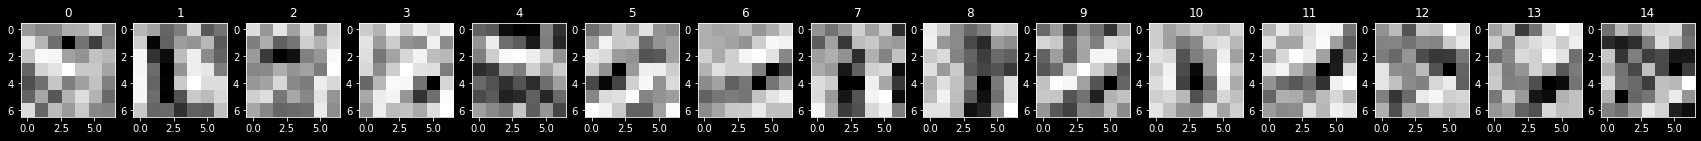

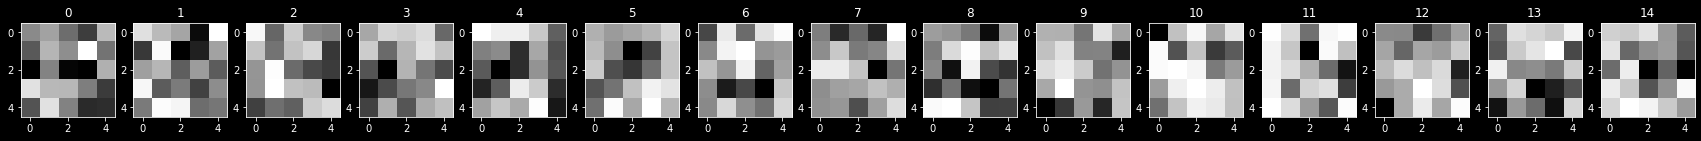

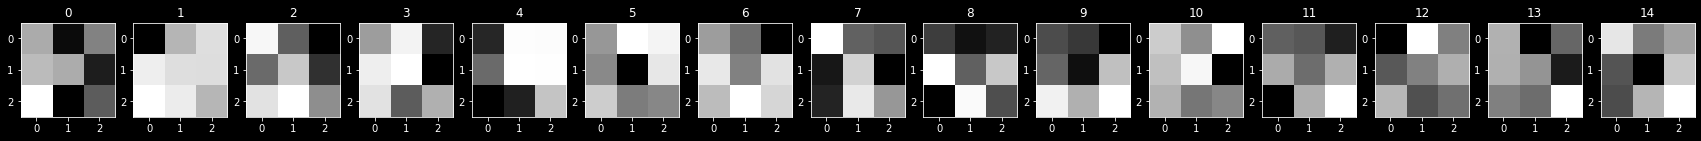

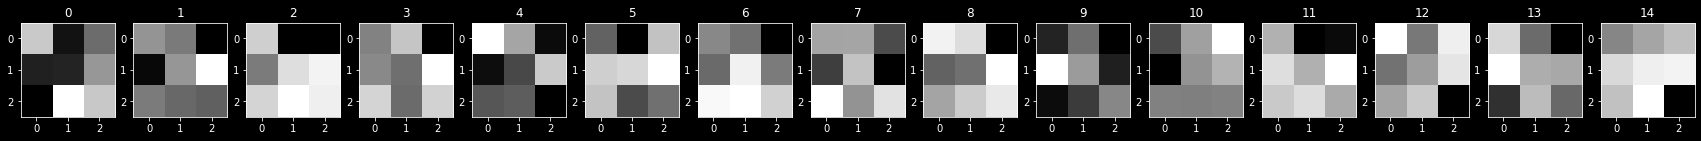

In [101]:
def plot_conv_weights(model, layer):
    W = model.get_layer(name=layer).get_weights()[0]
    if len(W.shape) == 4:
        W = np.squeeze(W)
        print(W.shape)
        if len(W.shape) == 4:
            W = W.reshape(W.shape[0], W.shape[1], W.shape[2] * W.shape[3]) 
        else:
            W = W.reshape(W.shape[0], W.shape[1], W.shape[2]) 
        fig, axs = plt.subplots(1,15, figsize=(30,30))
        # fig.subplots_adjust(hspace = .5, wspace=.001)
        axs = axs.ravel()
        for i in range(15):
            axs[i].imshow(W[:,:,i], cmap='Greys_r')
            axs[i].set_title(str(i))

for layer in model.layers:
    if 'conv' not in layer.name:
        continue
    else:
        plot_conv_weights(model, layer.name)

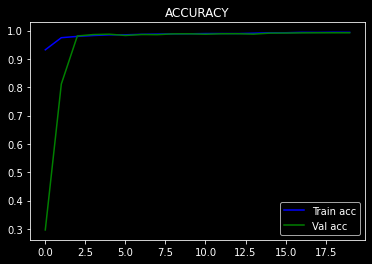

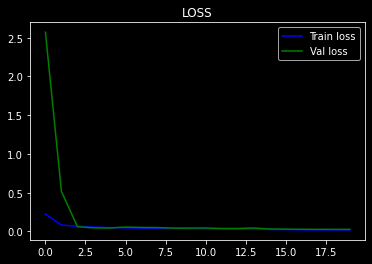

<Figure size 432x288 with 0 Axes>

In [102]:
acc = model_train['accuracy']
val_acc = model_train['val_accuracy']
loss = model_train['loss']
val_loss = model_train['val_loss']
epoch_count = range(len(acc))

plt.plot(epoch_count, acc, 'b', label='Train acc')
plt.plot(epoch_count, val_acc, 'g', label='Val acc')
plt.title('ACCURACY')
plt.legend()
plt.figure()

plt.plot(epoch_count, loss, 'b', label='Train loss')
plt.plot(epoch_count, val_loss, 'g', label='Val loss')
plt.title('LOSS')
plt.legend()
plt.figure()

plt.show()